# Project: No Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will analyze data from medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Today we will try to understand:
- What maybe the preferred Neighbourhood
- What ages are most affected with more than one diseases
- The impact of diseases for patients bellow 30 years old
- Which key factors we should consider to increase the rate of patient that show up to appoiments  


In [1]:
# import necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
from datetime import timedelta
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# load Appointments dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Check the tail of the data
df.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
# Check for duplicate rows
df.duplicated().sum()

0

In [5]:
# Check the shape
df.shape

(110527, 14)

In [6]:
# Check the data Types to see what may need to convert 
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
# Check the columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# Check breifly statistics 
# Min Age seems to be strange, deserves a deep check
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# Check for unique values to see if theres no error on columns where only 2 diferent values are needed 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

###### Check if theres Appointments scheduled in "future"

In [10]:
# Found ScheduledDay dates after the AppointmentDay, Most of them are due to the fact that the time on AppointmentDay were set 
# T00:00:00Z, what we will further do is to compare only by date (YYYY-MM-DD) to reduce this huge amount of negatives 

df[df['ScheduledDay'] > df['AppointmentDay']].shape

(38568, 14)

##### Check if theres negative Ages

In [11]:
# Found one row with negative Age, Further we will replace with mean of Ages
df [df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### Data Cleaning 

In [12]:
# Rename No Show column
df.rename(columns={'No-show':'No_show'}, inplace=True)

##### Dropping unnecessary columns

In [13]:
# We wont need PatientID and AppointmentID since day dont give relevant information 
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

##### Replace negative Ages with mean Age

In [14]:
# Save the mean age
mean_age = int(df.Age.mean())

In [15]:
# Replace the negative Age's with the average
df.loc[df['Age'] < 0, 'Age'] = mean_age

##### Create new column "Antecendence" storing the diference in days between AppointmentDay and ScheduledDay. This will also help to fix the issue with ScheduledDay set after the AppointmentDay

In [16]:
# Could trim of the time on Schedule Day but that would Generate too many duplicates and we would drop around 70% of the data
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [17]:
# Creating new column with the diffence between AppointmentDay and ScheduledDay
df['Antecedence'] = df['AppointmentDay'].subtract(df['ScheduledDay'], fill_value=0)

In [18]:
# Since we only need the Days in int to be easy to work with, we are now converting them 
df['Antecedence'] = df['Antecedence'].astype('timedelta64[D]') 

#### Perform checks after changes 

In [19]:
# Check how data looks like after cleaning
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Antecedence
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1.0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1.0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1.0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1.0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1.0


In [20]:
# Check antecedence to see the statistics 
df.describe().Antecedence

count    110527.000000
mean          9.183702
std          15.254996
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: Antecedence, dtype: float64

In [21]:
# Check the negative Antecedences (Appointments scheduled in "future")
df[df.Antecedence < 0].shape

(38568, 13)

##### Fix the issue with the ScheduledDay set to "future" compared with AppointmentDay

In [22]:
# Save the mean antecedence 
days_add= int(df.Antecedence.mean())
days_add

9

In [23]:
# Since the ScheduledDay and AppointmentDay is difficult to work because only one is detailed we add the mean of the antecedence 
# to correct the "negative" Scheduled Days 
df.loc[df['ScheduledDay'] > df['AppointmentDay'], 'AppointmentDay'] = df['AppointmentDay'] + timedelta(days= days_add) 

In [24]:
#Doube check if we still have appointments scheduled in furute
df[df['ScheduledDay']>df['AppointmentDay']]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Antecedence


In [25]:
# Replace the negative antecedence with mean
df.loc[df['Antecedence'] < 0, 'Antecedence'] = days_add

###### Perform Checks after changes

In [26]:
# Doublecheck if we get rid of negative antecedence
df[df.Antecedence < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Antecedence


In [27]:
# Further checking on data
df.tail(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Antecedence
110522,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,34.0
110523,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,34.0
110524,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,40.0
110525,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,40.0
110526,F,2016-04-27 13:30:56,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,40.0


In [28]:
# Check if changes genareted duplicateds 
sum(df.duplicated())

635

###### Drop Duplicates genareted by the previous changes and check

In [29]:
# Drop Duplicates 
df.drop_duplicates(inplace=True)

In [30]:
# Doublecheck if we still have duplicates
sum(df.duplicated())

0

In [31]:
# Final check on dataframe and we good to start with Explanatory Data Analysis
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Antecedence
0,F,2016-04-29 18:38:08,2016-05-08,62,JARDIM DA PENHA,0,1,0,0,0,0,No,9.0
1,M,2016-04-29 16:08:27,2016-05-08,56,JARDIM DA PENHA,0,0,0,0,0,0,No,9.0
2,F,2016-04-29 16:19:04,2016-05-08,62,MATA DA PRAIA,0,0,0,0,0,0,No,9.0
3,F,2016-04-29 17:29:31,2016-05-08,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,9.0
4,F,2016-04-29 16:07:23,2016-05-08,56,JARDIM DA PENHA,0,1,1,0,0,0,No,9.0


<a id='eda'></a>
## Exploratory Data Analysis


### 1 - The most liked Neighbourhoods for the patients who have scholarship with antecedent above the average

In [32]:
# Extracting the appointments for those who have Scholarship
df_liked = df[df.Scholarship == 1]

In [33]:
atencedence_mean = df_liked.Antecedence.mean()
atencedence_mean

11.628367743727432

In [34]:
# Extracting the data with atencedence above the average
df_liked =df_liked[ df_liked.Antecedence > atencedence_mean ]

In [35]:
# Separete dataframe into two new dataframes to see behavior for both cases
df_liked_Y = df_liked [df_liked['No_show'] == 'Yes']
df_liked_N = df_liked [df_liked['No_show'] == 'No']

In [36]:
# Adding into lists the common Neighbourhood
y_values = df_liked_Y.Neighbourhood.value_counts().keys().tolist()
n_values = df_liked_N.Neighbourhood.value_counts().keys().tolist()

In [37]:
# Using isin function to extract the top ten Neighbourhood
df_liked_Y = df_liked_Y[df_liked_Y.Neighbourhood.isin(y_values[:10])].Neighbourhood.value_counts()
df_liked_N = df_liked_N[df_liked_N.Neighbourhood.isin(n_values[:10])].Neighbourhood.value_counts()

In [38]:
def visual_pref(df_liked,liked_title):
    myplot = df_liked.plot.bar()
    myplotsns =sns.barplot( y=df_liked, x=df_liked.index)
    for item in myplot.get_xticklabels():
        item.set_rotation(90)
    
    plt.title(liked_title)
    plt.xlabel("Name of the Neighbourhoods")
    plt.ylabel("Number of the Patients")

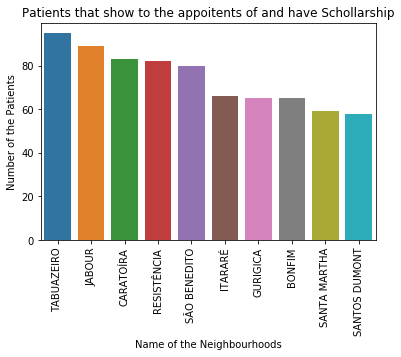

In [39]:
visual_pref(df_liked_N,"Patients that show to the appoitents of and have Schollarship")

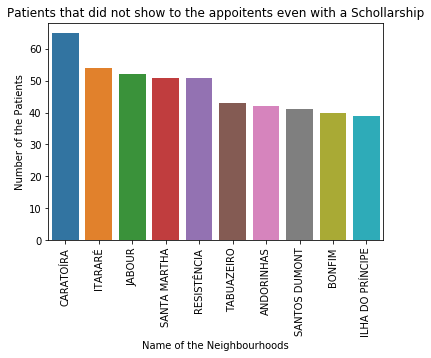

In [40]:
visual_pref(df_liked_Y,"Patients that did not show to the appoitents even with a Schollarship")

### 2 - The common Age's suffering for more than one disease

In [41]:
# Extract Data for pattients that match for more than one disease
df_handcap = df[df['Hipertension']+df['Diabetes']+df['Alcoholism']>1]

In [42]:
# Filter them by Handcap level
df_handcap_0 = df_handcap[df_handcap['Handcap'] == 0]

In [43]:
df_handcap_1 = df_handcap[df_handcap['Handcap'] == 1]

In [44]:
df_handcap_2 = df_handcap[df_handcap['Handcap'] == 2]

In [45]:
df_handcap_0.Age.describe()

count    7197.000000
mean       61.703210
std        12.320067
min         7.000000
25%        54.000000
50%        62.000000
75%        70.000000
max        99.000000
Name: Age, dtype: float64

In [46]:
df_handcap_1.Age.describe()

count    341.000000
mean      66.818182
std       13.113164
min       35.000000
25%       59.000000
50%       67.000000
75%       77.000000
max       95.000000
Name: Age, dtype: float64

In [47]:
df_handcap_2.Age.describe()

count    45.000000
mean     68.466667
std      15.473731
min      44.000000
25%      51.000000
50%      70.000000
75%      82.000000
max      94.000000
Name: Age, dtype: float64

In [48]:
# Group by Age to see the mean
df_handcap.groupby('Handcap').Age.mean()

Handcap
0    61.703210
1    66.818182
2    68.466667
Name: Age, dtype: float64

In [49]:
# To help me see the amount of appointments for each level and to see the relevance of each of them
df_handcap.Handcap.value_counts()

0    7197
1     341
2      45
Name: Handcap, dtype: int64

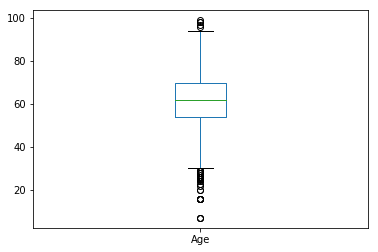

In [50]:
# Project the Age to clear the visualizations and statistics
df_handcap_0['Age'].plot(kind='box');

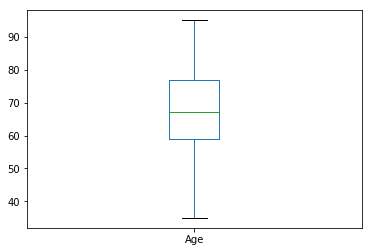

In [51]:
df_handcap_1['Age'].plot(kind='box');

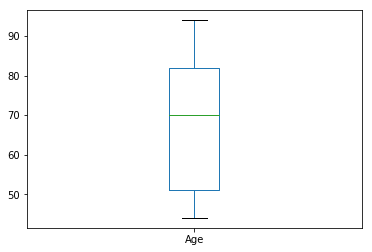

In [52]:
df_handcap_2['Age'].plot(kind='box');

### 3 - The impact of Diabetes,  Alcoholism and  Hipertension in people bellow 30 years old among the genders

In [53]:
def disease(gender, df = df):
    """In this function we will retreive the sum of appointmenst for each gender to be further visualized as result"""
    
    #lets use our own dataframe  
    df_30 = df
    #df_30.info()
    # Converting the column Gender to String 
    df_30['Gender'] = df_30['Gender'].astype(str)
    
    # Extracting only Females from the dataframe
    df_female = df_30[df_30['Gender'] == gender]
    
    # Filter for less than 30 Years
    df_female = df_female[df_female['Age'] < 30]
         
    return df_female['Diabetes'].sum(),df_female['Alcoholism'].sum(),df_female['Hipertension'].sum()

In [54]:
diabete_w, alcoholism_w, hipertension_W = disease("F")

In [55]:
diabete_m, alcoholism_m, hipertension_m = disease('M')

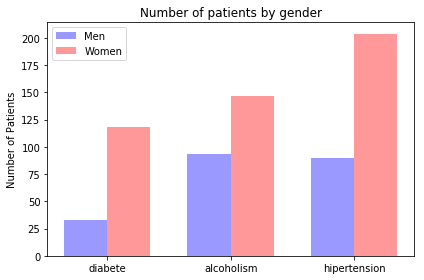

In [56]:
# Lets visualize the for both gender's the 
n_groups = 3

means_men   = (diabete_m, alcoholism_m, hipertension_m)
means_women = (diabete_w, alcoholism_w, hipertension_W)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b',
                 error_kw=error_config,
                label='Men')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='Women')

ax.set_ylabel('Number of Patients')
ax.set_title('Number of patients by gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('diabete', 'alcoholism', 'hipertension'))
ax.legend()

fig.tight_layout()
plt.show()

### 4 .1 - What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [57]:
# Define a function to visualize the pie
# Chart with this colors are just to follow the procedments of the analyses, the importants with finals results i preferred to kept 
# with the default colors set here
colors = ['#4C7F4C','#e10000']
def vis_pie(df=df,colors=colors):
    df.No_show.value_counts().plot(kind='pie',autopct='%.2f',colors=colors);

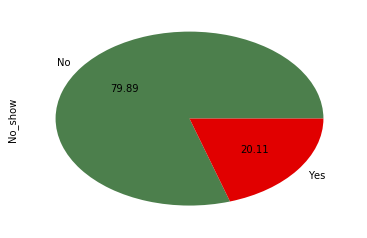

In [58]:
# No_Show fig 01 
vis_pie()

In [59]:
# Lets try to analise the data and improve the rate of "Yes" to the appointmens 
# Check the mean in each column grouped by who showed to the appointment
df.groupby('No_show').mean()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Antecedence
No_show,,,,,,,,
No,37.796114,0.093913,0.204433,0.073707,0.030480,0.022633,0.292708,11.915302
Yes,34.283917,0.115667,0.168703,0.064350,0.030229,0.020138,0.442755,15.618020


In [60]:
# We will start by analysing the columns with more variance to the ones with less, those will be the important keys to predict 
# Ignoring the disease columns, starting with Antecedence 
# Separete the Data frames by No_show column for better undurstanding
df_total_No = df[df['No_show']=='No']

In [61]:
df_total_Yes = df[df['No_show']=='Yes']

In [62]:
df_total_No.Antecedence.describe()

count    87794.000000
mean        11.915302
std         12.763964
min          0.000000
25%          6.000000
50%          9.000000
75%         11.000000
max        178.000000
Name: Antecedence, dtype: float64

In [63]:
df_total_Yes.Antecedence.describe()

count    22098.000000
mean        15.618020
std         16.058826
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max        178.000000
Name: Antecedence, dtype: float64

In [64]:
# Has we can see above most of the "No" show have the antecedence between 6 - 11 
# Most of "Yes" show have the antecedence between 5 - 22
# Lets try to cross macth and retrive most of the "NO" range 

In [65]:
# Pick the number 12 because its above of the 75% of the atendence of "NO" show and on the range of most of the "Yes" show patients
df_total_ant = df[df['Antecedence'] > 5]

In [66]:
# Pick the number 24 because its the top on 75% of "YES" show
df_total_ant = df_total_ant[ df_total_ant['Antecedence'] < 11]

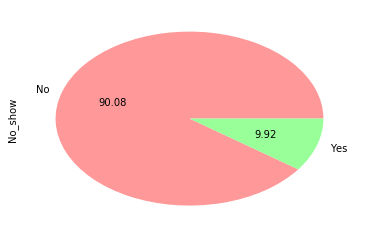

In [67]:
# No_Show fig 1.1 
vis_pie(df_total_ant,['#ff9999','#99ff99'])

In [68]:
#Check the statistics by Age to help set the better range
df_total_Yes.Age.describe()

count    22098.000000
mean        34.283917
std         21.965982
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

In [69]:
df_total_No.Age.describe()

count    87794.000000
mean        37.796114
std         23.349695
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [70]:
# The best would be to cross match and retrieve the interval of the the predominant age wish would be 1 - 18 (tested) but lets use 
# the bellow interval wish wouldnt change too much the previous result and hava a wide range
# limit data frame by Age - 18 start age of 25% of "NO" data 
df_total_age = df_total_ant[df_total_ant['Age'] > 18]

In [71]:
# limit data frame by Age - 115 of "NO" data 
df_total_age = df_total_ant[df_total_ant['Age'] < 115]

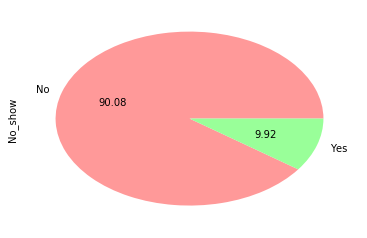

In [72]:
# No_Show fig 1.2 
vis_pie(df_total_age,['#ff9999','#99ff99'])

In [73]:
# Lets see how often the patient receive SMS
df_total_Sms = df_total_age[df_total_age['SMS_received'] == 0]
df_total_Sms_1 = df_total_age[df_total_age['SMS_received'] == 1]
df_total_Sms.shape[0]/df.shape[0],df_total_Sms_1.shape[0]/df.shape[0], 

(0.39249444909547554, 0.0588486878025698)

In [74]:
# Relation between received SMS and our current DataFrame
df_total_Sms.shape[0]/df_total_age.shape[0],df_total_Sms_1.shape[0]/df_total_age.shape[0]

(0.8696143067400552, 0.13038569325994476)

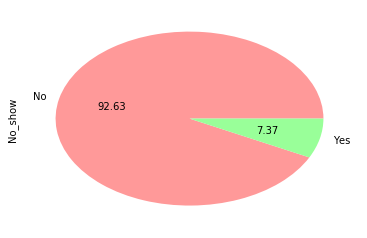

In [75]:
# No_Show fig 1.3 
# The patient who dont receive message is slightly most likely to show to the appointments 
vis_pie(df_total_Sms,['#ff9999','#99ff99'])

In [76]:
# Lets see how often Scholarship apears
df_total_sc  = df_total_Sms[df_total_Sms['Scholarship'] == 0]
df_total_sc1 = df_total_Sms[df_total_Sms['Scholarship'] == 1]
df_total_sc.shape[0]/df.shape[0],df_total_sc1.shape[0]/df.shape[0]

(0.3499708805008554, 0.04252356859462017)

In [77]:
# Relation between who has Scholarship and our current DataFrame
df_total_sc.shape[0]/df_total_Sms.shape[0],df_total_sc1.shape[0]/df_total_Sms.shape[0]

(0.891658165631086, 0.10834183436891404)

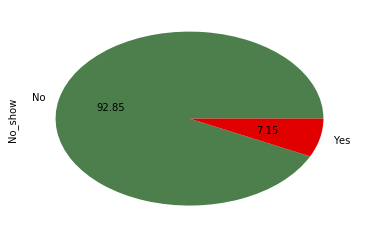

In [78]:
# No_Show fig 02 
# How can the statistics can change if the patient dont have schoolarship
vis_pie(df_total_sc)

###### Replicate the above steps in one new function to be used on common Month and Day 

In [79]:
def predict(dataframe):
    """I could use the same function for the above predictions but i preferred to set only to use on the bellow dataframes 
       so we can still check the previous step by steps that lead us to schoose these rules"""
    
    dataframe = dataframe[dataframe['Antecedence'] > 5]
    dataframe = dataframe[dataframe['Antecedence'] < 11]
    dataframe = dataframe[dataframe['Age'] >18]
    dataframe = dataframe[dataframe['Age'] < 115]
    dataframe = dataframe[dataframe['SMS_received'] == 0]
    dataframe = dataframe[dataframe['Scholarship'] == 1]
    vis_pie(dataframe)

#### 4.2 - Applying the same predictions for the common month only to see if the results will change or vary

In [80]:
df_month = df

In [81]:
# extract month from AppointmentDay to create new column
df_month['month'] = df_month['AppointmentDay'].dt.month

In [82]:
# creating the dataframe with the mode 
df_month = df_month[df_month['month'] == df_month['month'].mode()[0]]

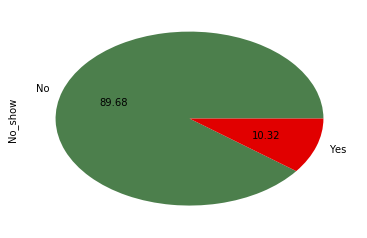

In [83]:
predict(df_month)

#### 4.3 - Applying the same predictions for the common day only

In [84]:
df_Day = df  

In [85]:
df_Day['AppDay'] = df_Day['AppointmentDay']

In [86]:
# Converting the new Columun in String for better manipulation 
df_Day['AppDay'] = df_Day['AppDay'].astype(str)

In [87]:
# Converting into panda Series with category as type
df_Day['AppDay'] = pd.Series(df_Day['AppDay']).astype('category')

In [88]:
# using the cat function to generate codes into a new column
df_Day['AppDayID'] = df_Day['AppDay'].cat.codes

In [89]:
df_Day = df_Day[df_Day['AppDayID'] == df_Day.AppDayID.mode()[0]]           

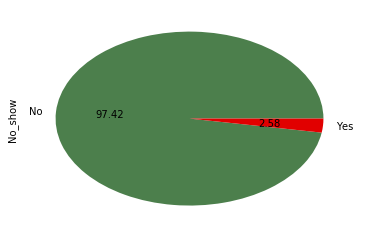

In [90]:
predict(df_Day)

<a id='conclusions'></a>
## Conclusions


1 - We can conclude that the preferred Neighbourhood are Tabuazeiro and Ilha do Principe. Where these share the fact that they all have scholarship and the schedules were made for at least 11 days before the appointment. 

2 - Its well known that aging most likely come along with diseases and the analysis here showed us that in people in the 60's in average had appointments for at least 2 diseases but the range of Handcap is from 0 to 2. 

3 - We can conclud that Men had less appointments, which indicates that they are more likely to be healthy than women. Cases like Hypertension and Diabetes the statistic has shown that women can double or triple the need of an appointment than men. 

4 - In this point we started to analyze the rate of people that showed to the appointment with the initial data were we could find out that only 80% made it. After a further inspection on we could retrieve more factors that help to find the behavior that can lead to 92% of chance to a patient make to an appointment. The factors that was analyzed are: Antecedence, Age, SMS_received and Scholarship were the sequence to filter was chosen according to the variance on the mean for the No_show column. 

Further more, the same comparing keys were used on a sample data of the most common month and the most common day were the result for month were maximized to 89% and went to 97% on the common day. This variance leads to conclude that appointment day can also contribute to a patient to show on the appointment.

5 - *Limitations* - The first limitation that is important to refer is the difference of the column appointment day and Scheduled day. First was the fact that was found too many rows on Schedule day set to future. The other fact that is important to refer is that the column Schedule Day contain the exactly time (HH:MM:SS) while the Day not. has you could see on the question 4 time we predict data from the whole dataframe but right after we did the same for the common month and day where the results were different. that leads us to conclude that we could be more accurate to predict even with the exactly timing. 

Found 635 duplicated rows wish was data that could be more accurate.

The other limitation is the home address of the patient were if we had at least a column to show the distance that the client needs to go trough to get to the Neighbourhood or the rate of the Neighbourhood. I would be able to specify and check the rate of No_show more precise. 